# Logistic Regression and Categorical Data

Learning Objectives:
* Students will learn about the nature of categorical data.
* Students will learn about the logistic function, logistic regression, and the application of logistic regression models to categorical output.
* Students will learn about and apply one-hot encoding of categorical input features.
* Students will learn about power-law distributions of data and apply the hashing trick for encoding power-law-distributed data.

Before class:
* Wikipedia article on [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression), [Introduction](https://en.wikipedia.org/wiki/Logistic_regression), [Applications (section 1)](https://en.wikipedia.org/wiki/Logistic_regression#Applications), and [Examples (section 2)](https://en.wikipedia.org/wiki/Logistic_regression#Examples).
* Introductory definition sections for [One-Hot](https://en.wikipedia.org/wiki/One-hot) and [Dummy Variable](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)) and [Power Law](https://en.wikipedia.org/wiki/Power_law)
* Read below up to (but not including) the section marked In Class.

Optional reference/tutorial:
* [Real Python "Logistic Regression in Python" article](https://realpython.com/logistic-regression-python/)
* [Analytics Vidhya "One-Hot Encoding vs. Label Encoding using Scikit-Learn"](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/)

In class:
* We will work together on the exercises in section "In Class".

Homework after class:
* Complete the section labeled "Homework" below before the next class when it will be collected.


# Categorical Data

Categorical data is, as the name implies, data that expresses categories to be assigned to [categorical variables](https://en.wikipedia.org/wiki/Categorical_variable).  Examples include a car's make (e.g. Toyota) and model (e.g. Corolla), sex (e.g. Female), qualitative characterizations (e.g. sweet, sour, bitter), and any other set of labels that aren't necessarily ordered/numeric in nature.  Below, we generate data based on the Wikipedia Logistic Regression [Examples (section 2)](https://en.wikipedia.org/wiki/Logistic_regression#Examples) with numeric input variable ```hours_studied``` and categorical output ```outcome``` with values ```pass```/```fail```.  Our objective in this example is to predict the outcome of an exam given the number of hours a student studied for it.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
import math

# NOTE: It is not necessary for you to understand this code at this point.  It is supplied for the curious.

# We begin by importing our entire pseudorandom number generator (PRNG) module and giving it a "seed" for reproducability:
from random import *
seed(0)
np.random.seed(0)

# We generate 500 random uniform numbers of student hours in the range 0.5 to 5.5:
df1 = pd.DataFrame(np.random.uniform(low=0.5, high=5.5, size=(500, 1)), columns=['hours_studied'])

# From these, we use an underlying logistic model (that we'll later try to estimate) to generate pass/fail results.
real_intercept = -4
real_hours_coeff = 1.5
def pass_prob(hours_studied):
    return (1 / (1 + math.exp(-(real_hours_coeff * hours_studied + real_intercept))))
df1['result'] = df1['hours_studied'].apply(lambda x: 'pass' if random() < pass_prob(x) else 'fail')

print(df1.describe())
print(df1.sample(10))

       hours_studied
count     500.000000
mean        2.982988
std         1.458782
min         0.523477
25%         1.739129
50%         2.934210
75%         4.153729
max         5.494235
     hours_studied result
168       4.149953   pass
243       1.160341   fail
108       1.615408   fail
474       5.201048   pass
173       0.592609   fail
67        0.985506   fail
52        5.441869   pass
495       1.858264   fail
35        3.588177   pass
69        0.980492   fail


## Logistic Regression

Logistic Regression seeks to fit a logistic function curve to data in the range $[0, 1]$.   We need to first convert our data target values to 1 (pass) and 0 (fail).  Below, we perform the conversion and visualize the data.

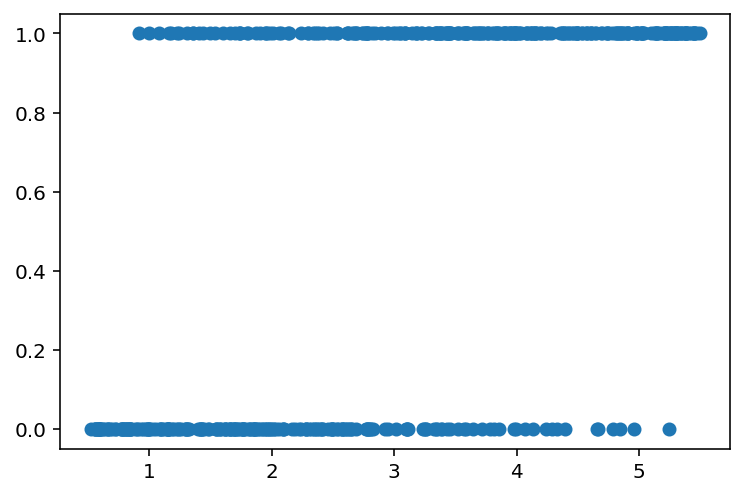

In [2]:
y = df1['result'].apply(lambda s: 1 if s == 'pass' else 0)
X = df1[['hours_studied']]
plt.scatter(X, y);

Note how there is a greater frequency of passing as the number of hours studied increases.  Just looking at the data, we could infer that the probability of passing is very low or very high with few or many hours of study, respectively.  However, in the middle range of values, there is not a sharp transitions from all failures to all passes; there is no magical number of hours of study to predict the outcome.  We expect a gradual transition of the underlying probability.  This is the most common use of logistic regression, to fit a logistic curve to the data so that we have a model for the underlying probability.  We can then round the model's prediction to 1 or 0 to make predictions for any input.

Performing a logistic regression is much like performing a linear regression, and not just syntactically.  The logistic function for multiple inputs is of the form $\frac{1}{1 + b^{-(\beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n)}}$.  Note the parenthesized expression in the denominator.  Where have you seen it before?

The parenthesized form is what we fit for linear regression, so that logistic regression is just linear regression form transformed through a logistic function.  Thus, it is no surprise that we find [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) in the linear regression module of ```sklearn```:

y-intercept: [-3.30365824]
x coefficient(s): [[1.22762643]]
R^2 score: 0.8
(1000, 2)


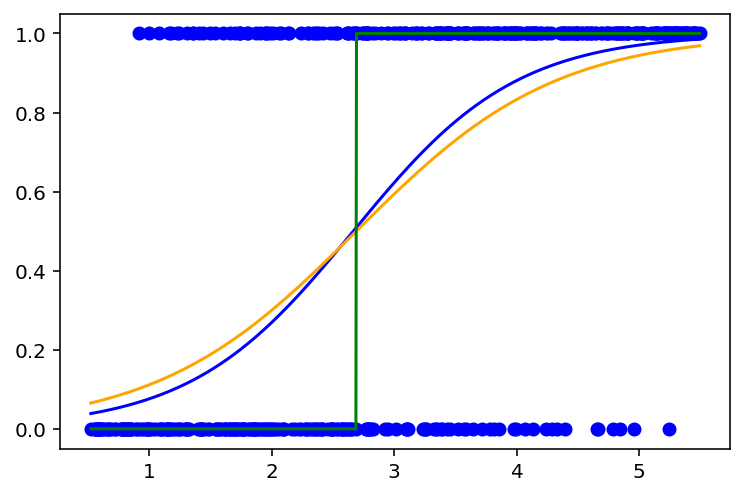

In [3]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X, y)
print('y-intercept:', logistic_regressor.intercept_)  # print the y-intercept
print('x coefficient(s):', logistic_regressor.coef_)  # print the x coefficient
print('R^2 score:', logistic_regressor.score(X, y))  # print R^2 score

# Plot the scatterplot of the data (blue), the original logistic generating function (blue),
# the fit logistic function (orange), and the model category prediction (green).
x_vals = np.linspace(start=X.min(), stop=X.max(), num=1000)  # 1000 linearly spaces points from the min to the max of x
y_fit = logistic_regressor.predict_proba(x_vals)  # n-by-2 nd array that has false/true probability estimates as second 0/1 index
y_predict = logistic_regressor.predict(x_vals)
y_source = [pass_prob(x) for x in x_vals]
print(y_fit.shape)
plt.scatter(X, y, color='blue')
plt.plot(x_vals, y_source, color='blue')
plt.plot(x_vals, y_fit[:, 1], color='orange')
plt.plot(x_vals, y_predict, color='green');

Over the original data, we see the original curve providing the source of the probabilities for the data (blue), the fit logistic curve of probability estimates (orange), and the true (1) / false (0) prediction (green) that would be made for our model by rounding the estimated probabilities (orange).  Note that we expect lower $R^2$ scores here because of the high variance of the data for intermediate values between the extremes.  We cannot expect high accuracy for such output.  However, we note that even with 500 data points, we were able to reconstruct the generating probability function fairly well.

We can close the loop in terms of our representation by creating a function to map back to ```pass``` and ```fail``` values:

In [4]:
def predict_pass_fail(hours_studied):
    return 'pass' if logistic_regressor.predict([[hours_studied]])[0] else 'fail'  # note that a 1 / 0 value can be used in place of True / False
print(predict_pass_fail(0.6))
print(predict_pass_fail(3.0))
print(predict_pass_fail(6.0))

fail
pass
pass


### Multiple logistic regression

The same techniques and syntax apply to multiple input variables, just as we saw with multiple linear regression.

### Multiple output categories

One way to apply logistic regression to the prediction of one of more than two output categories is called one-versus-all.  The approach is relatively simple:
* For each output ```y``` category ```c```:
  * Create a target ```y_c``` that is 1 when ```y``` is ```c``` and 0 otherwise ("versus-all").
  * Perform logistic regression to create a model ```m_c``` to predict the probability of belonging to category ```c```, i.e. ```y_c``` = 1.
* For an input ```x```, predict category ```c``` for whichever model ```m_c``` yields the highest probability of ```x``` belonging to ```c```.

In summary, we build a separate predictor for each category versus not belonging to that category.  We classify an input to the category whose predictor has highest confidence of the input belonging to that category.

## One-Hot Encoding of Categorical Data

All of our input data thus far has been numeric.  All of our regression techniques accept only numeric data.  **What does one do if one has categorical input data and wants to apply regression techniques that require numeric inputs?**  Suppose we have numeric input ```car_years``` and categorical input auto ```make``` (```Citroen```, ```Jeep```, and ```Toyota```) as input and numeric ```maintenance_cost``` output. 

Here's what _not_ to do: Assign make categories to unique integers and perform a linear/nonlinear regression.  Why is this a bad approach?  There's no reason to believe that these auto makes have an ordering such that the integers would offer a help our our regression.

Here's a better approach: Create new 1.0 / 0.0 (meaning True / False, respectively) numeric input features, one for each category, e.g. ```is_Citroen```, ```is_Jeep```, and ```is_Toyota```, and use these created binary category-indicating features in place of the original categorical input ```make```.

This is what is known as "One Hot Encoding".  Each category value is represented by having exactly one of the created binary features having a "hot" (1) value with all others having value 0.  Let's see this at work.  First, we'll generate our demonstration data.

In [5]:
makes = ['Citroen', 'Jeep', 'Toyota']
num_makes = len(makes)
base_values = [114, 173, 58]
stdev = 10.0
year_factor = 1.5
max_year = 20

num_rows = 500
df = pd.DataFrame(np.random.randint(low=0, high=max_year + 1, size=(num_rows, 1)), columns=['car_years'])
rand_indices = np.random.randint(low=0, high=num_makes, size=(num_rows, 1))
make_vals = [makes[rand_indices[i][0]] for i in range(num_rows)]
noise = np.random.normal(0, stdev, num_rows)
cost_vals = [max(0, base_values[rand_indices[i][0]] + year_factor * (df['car_years'][i] - max_year / 2) + noise[i]) for i in range(num_rows)]
df['make'] = make_vals
df['maintenance_cost'] = cost_vals
df.head(10)


,car_years,make,maintenance_cost
0,0,Jeep,154.995212
1,20,Jeep,184.449713
2,13,Jeep,158.576381
3,13,Citroen,116.721869
4,5,Jeep,168.009981
5,15,Toyota,76.047579
6,7,Toyota,63.100477
7,18,Toyota,65.835009
8,4,Toyota,46.231770
9,14,Jeep,190.239053


In ```pandas```, it is particularly easy to create the one-hot-enconding variables: 

In [6]:
X = pd.get_dummies(df.make, prefix='make')
X.head(10)

,make_Citroen,make_Jeep,make_Toyota
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


However, to use this with unseen future data is awkward, as we have no stored way of performing the encoding again for individual instances.  That's why some prefer the ```sklearn``` [```OneHotEncoder```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [7]:
from sklearn import preprocessing
onehotencoder = preprocessing.OneHotEncoder()
# Reshape the make one-dimensional array to 2D as fit_transform expects a 2D array and fit the object 
make_ohe = onehotencoder.fit_transform(df.make.values.reshape(-1,1)).toarray()
print("Our one-hot-encoded make data:")
print(make_ohe)
# If we wanted to add this back into the original dataframe,
# 1) Create column names for the encoding.
one_hot_column_names = ["make_"+str(int(i)) for i in range(make_ohe.shape[1])]
print('New columns:', one_hot_column_names)
# 2) Create a new dataframe with these columns and our one-hot encoded data
dfOneHot = pd.DataFrame(make_ohe, columns = one_hot_column_names)
# 3) Concatentate our original dataframe df with the dataframe containing our new columns
df = pd.concat([df, dfOneHot], axis=1)
df.head()

Our one-hot-encoded make data:
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
New columns: ['make_0', 'make_1', 'make_2']


,car_years,make,maintenance_cost,make_0,make_1,make_2
0,0,Jeep,154.995212,0.0,1.0,0.0
1,20,Jeep,184.449713,0.0,1.0,0.0
2,13,Jeep,158.576381,0.0,1.0,0.0
3,13,Citroen,116.721869,1.0,0.0,0.0
4,5,Jeep,168.009981,0.0,1.0,0.0


We've generated our demonstration data with a linear relationship, so we are now in a position to linearly regress ```maintenance_cost``` onto our numeric features: ```car_years```, ```make_0```, ```make_1```, and ```make_2```.  (Of course, we could hand nonlinear relationships in data as well.)

In [8]:
X = df[['car_years', 'make_0', 'make_1', 'make_2']]  # select input(s)
y = df[['maintenance_cost']]  # select output
linear_regressor = LinearRegression()  # create linear regression object
linear_regressor.fit(X, y)  # perform linear regression of output onto inputs
print('y-intercept:', linear_regressor.intercept_)  # print the y-intercept
print('X coefficient(s):', linear_regressor.coef_)  # print the x coefficient
print('R^2 score:', linear_regressor.score(X, y))  # print R^2 score

y-intercept: [99.37145854]
X coefficient(s): [[  1.56469678  -0.78581503  57.74981257 -56.96399754]]
R^2 score: 0.9614389037101071


From this model, we can see that our base cost prediction in the y-intercept.  We can also see that car_years contributes to cost increase, and that Jeeps and Toyotas respectively increase and decrease the expected cost.

Let suppose we have some new car data.  How can we use our learned model?  Thankfully, our ```OneHotEncoding``` object still exists for transforming the data.  Watch how we do not "fit" its transformation, but rather just use its transformation.

First, we'll generate a 3 data values as we did above but without values.

In [9]:
np.random.seed(6)
num_rows = 3
df_new = pd.DataFrame(np.random.randint(low=0, high=max_year + 1, size=(num_rows, 1)), columns=['car_years'])
rand_indices = np.random.randint(low=0, high=num_makes, size=(num_rows, 1))
make_vals = [makes[rand_indices[i][0]] for i in range(num_rows)]
noise = np.random.normal(0, stdev, num_rows)
df_new['make'] = make_vals
df_new

,car_years,make
0,10,Citroen
1,9,Toyota
2,3,Jeep


Next we'll go through the same steps to apply one-hot encoding but _reapplying_ what we've already created:

In [10]:
make_ohe = onehotencoder.transform(df_new.make.values.reshape(-1,1)).toarray()
print("Our one-hot-encoded make with new data:")
print(make_ohe)
# Create a new dataframe with these columns and our one-hot encoded data
dfOneHot = pd.DataFrame(make_ohe, columns = one_hot_column_names)
# 3) Concatentate our original dataframe df with the dataframe containing our new columns
df_new = pd.concat([df_new, dfOneHot], axis=1)
df_new.head()

Our one-hot-encoded make with new data:
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


,car_years,make,make_0,make_1,make_2
0,10,Citroen,1.0,0.0,0.0
1,9,Toyota,0.0,0.0,1.0
2,3,Jeep,0.0,1.0,0.0


Finally, we can apply our linear regression model to predict maintenance cost values.

In [11]:
X = df_new[['car_years', 'make_0', 'make_1', 'make_2']]  # select input(s)
y = linear_regressor.predict(X)
print(y)
df_new['maintenance_cost'] = y
df_new

[[114.23261127]
 [ 56.48973199]
 [161.81536144]]


,car_years,make,make_0,make_1,make_2,maintenance_cost
0,10,Citroen,1.0,0.0,0.0,114.232611
1,9,Toyota,0.0,0.0,1.0,56.489732
2,3,Jeep,0.0,1.0,0.0,161.815361


There are two final important things to note.  One is a caveat.  Notice that given any two of these one-hot encoded values starting with ```make_```, we can predict the third.  Therefore, if we're looking for patterns in our one-hot encoded data, we can fall into the "dummy variable" trap, causing problems with some techniques because there isn't independence among these inputs.  The solution is simple: drop any one of our ```make_``` variables from our model building.

The second important thing to note is that one-hot encoding becomes too computationally cumbersome when there are too many distinct categorical values.  For this difficulty, we do something similar, using something called "the hashing trick".

## Power-Law Distributions and the Hashing Trick

There are many types of data that exhibit a [Power Law Distribution](https://en.wikipedia.org/wiki/Power_law) with most values being a popular few, yet having many different unique values.  In the code below, I'll generate some string data according to a Power Law Distributions and we'll see its characteristics:

Number of numeric values generated: 10000
Histogram of Distribution:


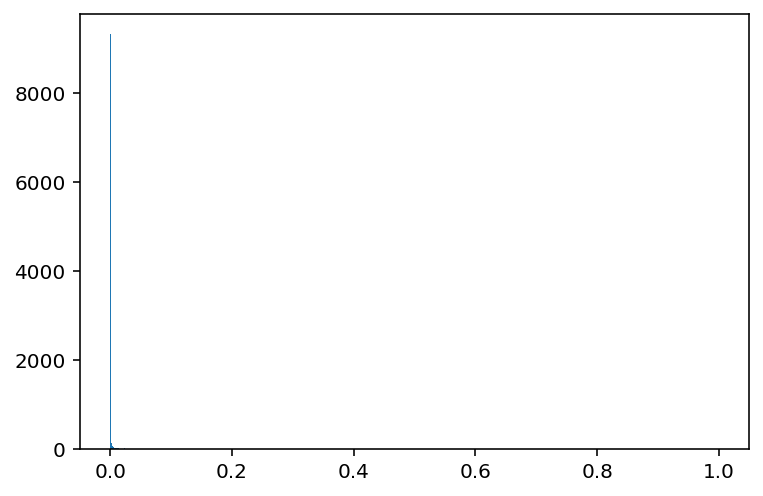

count     10000
unique      129
top       aaaab
freq       3668
Name: c1, dtype: object


,c1,y
0,aaaab,0.082508
1,aaaab,0.082369
2,aaaac,-0.432031
3,aaaad,-0.493635
4,aaaac,-0.432336
5,aaaac,-0.432212
6,aaaab,0.084397
7,aaaad,-0.492776
8,aaaac,-0.434290
9,aaaac,-0.433184


In [12]:
# Generating power law distribution of numbers according to https://en.wikipedia.org/wiki/Pareto_distribution#Random_sample_generation
# with Pareto Principle alpha value.
seed(0)
num_values = 10000
print("Number of numeric values generated:", num_values)
x_m = 1.0
alpha = 1.16
X = [x_m / (random() ** (1/alpha)) for i in range(10000)]
x_max = max(X)
X = [round(x / x_max, 4) for x in X]
print("Histogram of Distribution:")
_ = plt.hist(X, bins=1000)
plt.show()

# Convert numbers to strings of letters
alpha = 'abcdefghij'
def convert_to_str(x):
    x_str = str(x)
    x_str = x_str.replace('.','')
    x_chars = list(x_str)
    l_chars = [alpha[int(ch)] for ch in x_chars]
    return "".join(l_chars)
S = [convert_to_str(x) for x in X]
S_set = set(S)

# Associate values:
val_dict = {s:random() - 0.5 for s in S_set}
df = pd.DataFrame(S, columns=['c1'])
y_vals = [val_dict[s] + np.random.normal(scale=0.001) for s in S]
df['y'] = y_vals
print(df.c1.describe())
df.head(10)

What we've created are 10,000 numeric values scaled to $[0, 1]$ and rounded to 4 decimal places. The distribution shows that, after scaling, almost all values are very small and the smallest comprises over a third of the total values.  And yet there are 129 unique values among the 10000.  These are converted into categorical data strings and each string is associated with some base value, and a bit of noise is introduced to the dataset.

This is a small sample for demonstration purposes.  The [Kaggle Criteo Display Advertising Challenge](https://www.kaggle.com/c/criteo-display-ad-challenge) had one categorical variable with over 10 _million_ unique values, but relatively few values made up a large share of values for that variable.

Here we'll describe and then demonstrate what is known as the hashing trick.  Here is our strategy:
* For each category value, put it through a [hash function](https://en.wikipedia.org/wiki/Hash_function) that maps data of arbitrary size to a fixed set of values.  These values are generally integers that appear random, but are arrived at through a deterministic process like a pseudorandom number generator.
* Take the resulting integer's absolute value, and then compute modulus (%) some number of binary 0/1 variables that one wants as a limit.  These function similar to one-hot variables, yet there can be _collisions_ (two different values mapping to the same index) and there will be collisions guaranteed if the number of binary variables is less than the number of unique values.
* One then does an encoding as if one has computed one-hot variable indices.

Here's the trick that makes this work well.  If there are relatively few common values, and you have chosen enough values such that these common values do not collide, you get most of the performance of one-hot encoding without exploding your memory usage.  Let's see this in action.

In [13]:
num_variables = 40  # far less than the number of unique values
var_names = ["h" + str(int(i)) for i in range(num_variables)]
print("hashing trick variables:", var_names)
df_hash = pd.DataFrame(np.zeros((num_values, num_variables)), columns=var_names)
hash_vals = [abs(hash(s)) % num_variables for s in df['c1']] # many Python built-in types have a hash predefined
print("First 10 hash values:", hash_vals[0:10])
for i, val in enumerate(hash_vals):
    var_name = 'h' + str(val)
    df_hash[var_name][i] = 1 # put a 1 in row i under the hash variable h# for the i_th hash value #
print(df_hash.head(10))

# With this encoding, we can now perform whatever regression is appropriate.  
# Here and in exercises, apply _ridge_ regression.  Linear regression applied
# to these problems can result in large coefficients.  Ridge regression is linear
# regression but with a "regularization" penalty for large coefficients.
X = df_hash  # select input(s)
y = df[['y']]  # select output
ridge_regressor = Ridge()  # create ridge regression object
ridge_regressor.fit(X, y)  # perform ridge regression of output onto inputs
print('y-intercept:', ridge_regressor.intercept_)  # print the y-intercept
print('X coefficient(s):', ridge_regressor.coef_)  # print the x coefficient
print('R^2 score:', ridge_regressor.score(X, y))  # print R^2 score

# Predictions for 'aaaab', 'aaaac', 'aaaad', 'aaaae', 'aaaaf', and 'aaaag'
S_new = ['aaaab', 'aaaac', 'aaaad', 'aaaae', 'aaaaf', 'aaaag']
df_hash_new = pd.DataFrame(np.zeros((len(S_new), num_variables)), columns=var_names)
hash_vals = [abs(hash(s)) % num_variables for s in S_new] # many Python built-in types have a hash predefined
for i, val in enumerate(hash_vals):
    var_name = 'h' + str(val)
    df_hash_new[var_name][i] = 1 # put a 1 in row i under the hash variable h# for the i_th hash value #
X = df_hash_new
print(ridge_regressor.predict(X))

hashing trick variables: ['h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24', 'h25', 'h26', 'h27', 'h28', 'h29', 'h30', 'h31', 'h32', 'h33', 'h34', 'h35', 'h36', 'h37', 'h38', 'h39']
First 10 hash values: [34, 34, 36, 22, 36, 36, 34, 22, 36, 36]


    h0   h1   h2   h3   h4   h5   h6   h7   h8   h9  ...  h30  h31  h32  h33  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   h34  h35  h36  h37  h38  h39  
0  1.0  0.0  0.0  0.0  0.0  0.0  
1  1.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  1.0 

Thus, we can see that the hashing trick can perform a decent regression on a power law distribution using a number of binary variables for encoding categorical data with a much larger number of unique values.  Looking at the top size most frequent values, we can see here that the 1st and 4th most common values collide to the detriment of the regression accuracy.  However, even with this severe collision scenario, we can see that the technique is largely successful.  On a commercial scale, we would have many more hashing variables and and many magnitudes larger for the number of unique values.

For an imperfect analogy, imagine that each hashed category is a different post office box.  We can associate a recipient with each box.  Letters meant for one recipient will get delivered to the same P.O. box as another recipient, but if almost all of the mail is going to few recipients, then the fraction of miss-delivered mail will be relatively small.  In the same way, the coefficients will be good estimates for the most frequent values provided that our number of hashing variables is large enough.

This hashing trick is often used in industry to deal with massive amounts of categorical data that follows a power law distribution.

# In Class

Together in class, you will seek to build models for each of the given data sets using the techniques above.

**Exercise 1:** Perform logistic regression on the data of [ic8-1.csv](http://cs.gettysburg.edu/~tneller/ds256/data/inclass/ic8-1.csv).  Perform the same steps as with the ```hours_studied```/```result``` example above.  In this case, you will not have the generating model (the blue curve plotted above), and you'll predict output ```positive```/```negative``` for ```ppm``` values 5, 20, and 35.  You should have an $R^2$ score of 0.818 and your answers should be 'negative', 'positive', and 'positive', respectively.

**Exercise 2:** The data of [ic8-2.csv](http://cs.gettysburg.edu/~tneller/ds256/data/inclass/ic8-2.csv) has one numeric input ```x1``` and two categorical inputs ```c1``` and ```c2```.  Assume that there is a linear relationship between input data and numerical output ```y```.  Build a linear regression model for ```y``` using the steps described above in the One-Hot Encoding section.  Finally, predict the ```y``` value that would correspond to ```x1``` = 0.1, ```c1``` = 'b', and ```c2``` = 'y'.  You should have an $R^2$ score of about 0.985 and your predicted ```y``` value should be about 0.401.

**Exercise 3:** The data of [ic8-3.csv](http://cs.gettysburg.edu/~tneller/ds256/data/inclass/ic8-3.csv) has one categorical input ```c1``` and one numeric output ```y```.  First find the number of unique categorical values.  Then find a number of hashing variables less than half of the number of unique values that yields an $R^2$ for ridge regression greater than or equal to .9.  Print the prediction of the most frequent value. (Hint: ```print(df.c1.describe())``` to see statistics on categorical variable ```c1``` in dataframe ```df```.)

## Homework

**Exercise 1:** Perform logistic regression on the data of [hw8-1.csv](http://cs.gettysburg.edu/~tneller/ds256/data/inclass/hw8-1.csv) following all steps of in-class exercise 1, with predictions printed in the original target categorical form for input values -0.5, 0.0, and 0.5.  

**Exercise 2:**  Perform the same work as in-class exercise 2, except using [hw8-2.csv](http://cs.gettysburg.edu/~tneller/ds256/data/inclass/hw8-2.csv) and predicting ```y``` for ```x1``` = -0.5, ```c1``` = 'z', and ```c2``` = 'q'.

**Exercise 3:**  Do the same as in-class exercise 3, but with  [hw8-3.csv](http://cs.gettysburg.edu/~tneller/ds256/data/inclass/hw8-3.csv).

(end of homework)